# The Battle of Neighbourhoods: New York vs Toronto

## Step 1: Importing Libraries

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

print('Libraries Imported!')

Solving environment: done

# All requested packages already installed.

Libraries Imported!


## Step 2: Importing Dataframes from previous Notebooks ( New York and Toronto)

In [3]:
NY_grouped = pd.read_excel('NY_grouped.xlsx')
Toronto_grouped = pd.read_excel('Toronto_grouped.xlsx')

## Step 3: Merging New York and Toronto data in order to perform clustering

In [4]:
L1 = list(NY_grouped.columns)
L2 = list(Toronto_grouped.columns)
L=list(set(L1).intersection(L2))

df=pd.merge(NY_grouped,Toronto_grouped, on=L,how='outer')
cols = [col for col in df.columns if col not in L]
df=df.drop(cols,axis=1)
df.head()

,Neighborhood,Accessories Store,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Allerton,0.0,0.0,0.031250,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.062500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.062500,0.0625,0.03125,0.0,0.000000,0.03125,0.0,0.03125,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,0.0,0.0,0.0,0.

## Step 4: Implementing PCA in order to reduce dimensionality, yet retaining the variance

Text(0, 0.5, 'cumulative explained variance')

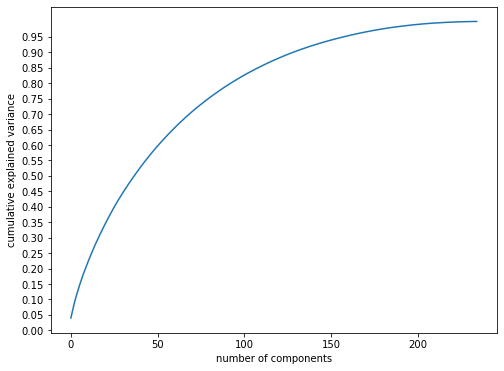

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

neigh_name = df['Neighborhood']
df_grouped_clustering = df.drop('Neighborhood', 1)

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(df_grouped_clustering)

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.0, step=0.05))
# plt.xticks(np.arange(0, 450, step=30))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [7]:
pca = PCA(n_components=175)
dataset = pca.fit_transform(data_rescaled)

## Step 5: Elbow Method to determine the number of clusters

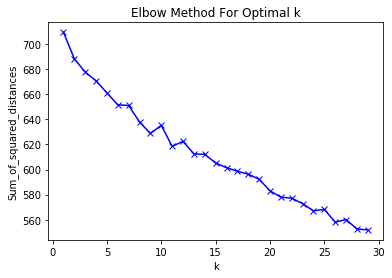

In [8]:
Sum_of_squared_distances = []
K = range(1, 30)
for kclusters in K:
    km = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001,  random_state=10).fit(dataset)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


## Step 6: Silhouette score method to determine the number of clusters

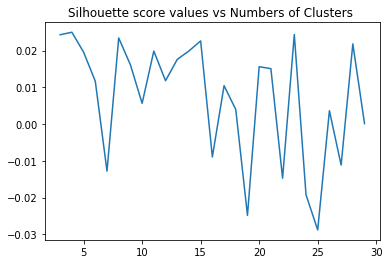

Optimal number of components is:
4


In [9]:
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt
 
obs = dataset.copy() 
# obs = numpy.concatenate( (numpy.random.randn(100, 2) , 20 + numpy.random.randn(300, 2) , -15+numpy.random.randn(200, 2)))
silhouette_score_values=list()
 
NumberOfClusters=range(3,30)
 
for i in NumberOfClusters:
    
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=10)
    classifier.fit(obs)
    labels= classifier.predict(obs)
#     print("Number Of Clusters:")
#     print(i)
#     print("Silhouette score value")
#     print(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', random_state=0))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)

## Step 7: Function to return top 5 venues

In [10]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [11]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df['Neighborhood']

for ind in np.arange(df.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allerton,Pizza Place,Deli / Bodega,Bakery,Chinese Restaurant,Department Store
1,Annadale,Pizza Place,Bakery,Dance Studio,Restaurant,Diner
2,Arden Heights,Pharmacy,Coffee Shop,Pizza Place,Coworking Space,Drugstore
3,Arlington,American Restaurant,Intersection,Grocery Store,Deli / Bodega,Coffee Shop
4,Arrochar,Deli / Bodega,Italian Restaurant,Pizza Place,Bagel Shop,Sandwich Place


In [12]:
df_grouped_clustering = dataset.copy()
df_grouped_clustering

array([[-0.24186534,  0.02598314, -0.06635707, ...,  0.01580283,
         0.00031154, -0.03207807],
       [-0.02733135, -0.07123444,  0.19960898, ..., -0.00171222,
        -0.06481775, -0.04508687],
       [-0.22665628, -0.04351869, -0.04668625, ..., -0.01987447,
        -0.04021054, -0.00289321],
       ...,
       [ 0.01974293, -0.302199  , -0.04024961, ..., -0.02621204,
         0.06372279,  0.02349915],
       [-0.24442254, -0.09345888, -0.04782274, ...,  0.00674494,
         0.07183545,  0.02635652],
       [-0.19547988, -0.23855177,  0.05959309, ...,  0.06621148,
         0.01162137,  0.08136841]])

## Step 8: Performing K-Means

In [13]:
# set number of clusters
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=2, copy_x=True).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


In [18]:
df_grouped_with_cluster = df.copy()
df_grouped_with_cluster.insert(0, 'Cluster_Labels', kmeans.labels_)

In [19]:
df_grouped_with_cluster.head()

,Cluster_Labels,Neighborhood,Accessories Store,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,4,Allerton,0.0,0.0,0.031250,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.062500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.062500,0.0625,0.03125,0.0,0.000000,0.03125,0.0,0.03125,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0

In [20]:
df_with_cluster_and_neighborhood = df_grouped_with_cluster[['Cluster_Labels', 'Neighborhood']]

## Step 9: Appending New York data and Toronto data with respective cluster labels

In [23]:
NY_data = pd.read_excel('NY_data.xlsx')
Toronto_data = pd.read_excel('Toronto_data.xlsx')
print('NY_data shape: ', NY_data.shape)
print('Toronto_data shape: ', Toronto_data.shape)

NY_data shape:  (306, 4)
Toronto_data shape:  (103, 5)


In [24]:
NY_data_merged = NY_data[['Neighborhood', 'Latitude', 'Longitude']]
NY_data_merged = NY_data_merged.merge(df_with_cluster_and_neighborhood, on = 'Neighborhood', how = 'left')

In [25]:
NY_data_merged.dropna(inplace = True)
NY_data_merged.head()

,Neighborhood,Latitude,Longitude,Cluster_Labels
0,Wakefield,40.894705,-73.847201,0.0
1,Co-op City,40.874294,-73.829939,0.0
2,Eastchester,40.887556,-73.827806,4.0
3,Fieldston,40.895437,-73.905643,4.0
4,Riverdale,40.890834,-73.912585,4.0


In [26]:
Toronto_data_merged = Toronto_data[['Neighborhood', 'Latitude', 'Longitude']]
Toronto_data_merged = Toronto_data_merged.merge(df_with_cluster_and_neighborhood, on = 'Neighborhood', how = 'left')

In [27]:
Toronto_data_merged.dropna(inplace = True)
Toronto_data_merged.shape

(98, 4)

## Step 10: Visualizing New York City clusters in Folium Map

In [28]:
address_NY = 'Manhattan, NY'

geolocator = Nominatim(user_agent="NY_explorer")
location = geolocator.geocode(address_NY)
latitude_NY = location.latitude
longitude_NY = location.longitude
print('The geograpical coordinate of Detroit,MI are {}, {}.'.format(latitude_NY, longitude_NY))

The geograpical coordinate of Detroit,MI are 40.7896239, -73.9598939.


In [29]:
# create map
map_NY_with_clusters = folium.Map(location=[latitude_NY, longitude_NY], zoom_start= 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NY_data_merged['Latitude'], NY_data_merged['Longitude'], NY_data_merged['Neighborhood'], NY_data_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + " "  + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_NY_with_clusters)
       
map_NY_with_clusters


## Step 11: Visualizing Toronto City Clusters with Folium Map

In [30]:
address_can = 'East York, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address_can)
latitude_tor = location.latitude
longitude_tor = location.longitude
print('The geograpical coordinate of Detroit,MI are {}, {}.'.format(latitude_tor, longitude_tor))

The geograpical coordinate of Detroit,MI are 43.699971000000005, -79.33251996261595.


In [31]:
# create map
map_Toronto_with_clusters = folium.Map(location=[latitude_tor, longitude_tor], zoom_start= 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_data_merged['Latitude'], Toronto_data_merged['Longitude'], Toronto_data_merged['Neighborhood'], Toronto_data_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + " "  + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_Toronto_with_clusters)
       
map_Toronto_with_clusters
